In [0]:
#from google.colab import files
#files.upload()

Saving test_image.pkl to test_image (1).pkl


{'test_image.pkl': b'\x80\x03]q\x00(]q\x01(K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K4K\xc0KsK\x1bK\x01K\x01K\x1fK\x8fK\xb3K K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x05KqK\xb9K\xd8K\xbeK\xe5K\xedK\xdcK\xd9K\xf2K\xc9K\xbfK\xdeK\xa7KWK\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K2K\xafK\xc2K\xbdK\xbaK\xb9K\xbbK\xc7K\xbcK\xb8K\xc1K\xb9K\xbcK\xb7K\xbbK\xc1K\xd2K\x0fK\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\xc7K\xc2K\xb5K\xbcK\xbeK\xbdK\xbcK\xc0K\xc7K\xc5K\xc3K\xc0K\xbfK\xbcK\xb8K\xb1K\xbdK\xb2K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K0K\xc2K\xbdK\xbdK\xc1K\xbdK\xbdK\xbcK\xbcK\xbfK\xbfK\xbeK\xc1K\xbeK\xbcK\xbaK\xc2K\xb8K\xbdK*K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\xc2K\xe4K\xc4K\xbeK\xbdK\xbfK\xb1K\xb1K\xb5K\xbbK\xbaK\xb8K\xb4K\xb5K\xbcK\xc0K\xbcK\xbbK\xbfK~K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\xdbK\xeeK\xcdK\xbeK\xbeK\xb3K\xc0K\xdcK\xd1K\xe0K\xe7K\xdcK\xe3K\xceK\xb8K\xbdK\xbcK\xc4K\xbaK\xbeK\x00K\x00K\x00K\x00K\x0

In [0]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
with open('train_label.pkl','rb') as f:
    train_label = pickle.load(f)
with open('train_image.pkl','rb') as f:
    train_image = pickle.load(f)

In [0]:
#Since we have 0,2,3,6 labels, we will replace label 6 with 1
for i in range(8000):
  if train_label[i]==6:
    train_label[i] = 1

Splitting the dataset into training set and validation set. Validation set to validate the performance of the model on new samples and to check the problem of overfitting

In [0]:
# Splitting the dataset into the Training set and Validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_image, train_label, test_size = 0.25, random_state = 29)

In [0]:
from keras import layers
from keras import models
from keras.layers import Dropout
from keras.utils import to_categorical
from keras import optimizers

In [0]:
num_X_train = len(X_train)
num_X_test = len(X_test)
print(num_X_train)
print(num_X_test)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = y_train.reshape((num_X_train,1))
y_test = y_test.reshape((num_X_test,1))

X_train = X_train.reshape((num_X_train,28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((num_X_test, 28, 28, 1))
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

6000
2000


In [0]:
def baseline_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(64, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(128, (3,3), activation='relu'))
  model.add(Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(Dropout(0.1))
  model.add(layers.Dense(256,activation='relu'))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(4,activation='sigmoid'))
  return model

In [0]:
opt = optimizers.rmsprop(lr=0.0001, decay=1e-6)
model = baseline_model()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

Fitting the model. Initially training for 30 epochs as it will take some time to fit and then train for 10 epochs iteratively so as to check the performance of model and it does not get trained a lot and lead to overfitting.


In [0]:
history = model.fit(X_train, y_train, epochs=30, batch_size=300, validation_data=(X_test, y_test), shuffle=True)

Train on 6000 samples, validate on 2000 samples
Epoch 1/30
6000/6000 [==============================] - 10s 2ms/step - loss: 1.3172 - acc: 0.5065 - val_loss: 1.1663 - val_acc: 0.5865
Epoch 2/30
6000/6000 [==============================] - 9s 1ms/step - loss: 1.0467 - acc: 0.5767 - val_loss: 0.9612 - val_acc: 0.6090
Epoch 3/30
6000/6000 [==============================] - 9s 1ms/step - loss: 0.9131 - acc: 0.6020 - val_loss: 0.8627 - val_acc: 0.6345
Epoch 4/30
6000/6000 [==============================] - 9s 1ms/step - loss: 0.8590 - acc: 0.6255 - val_loss: 0.8214 - val_acc: 0.6370
Epoch 5/30
6000/6000 [==============================] - 9s 1ms/step - loss: 0.8308 - acc: 0.6297 - val_loss: 0.8021 - val_acc: 0.6295
Epoch 6/30
6000/6000 [==============================] - 9s 1ms/step - loss: 0.8036 - acc: 0.6395 - val_loss: 0.7740 - val_acc: 0.6525
Epoch 7/30
6000/6000 [==============================] - 9s 1ms/step - loss: 0.7762 - acc: 0.6483 - val_loss: 0.7655 - val_acc: 0.6520
Epoch 8/30
60

Saving the model after  each training

In [0]:
model.save('model1.h5')
#files.download('model1.h5')

Plotting the curves of loss and accuracy for training set and validation set after running model.fit each time to check overfitting.

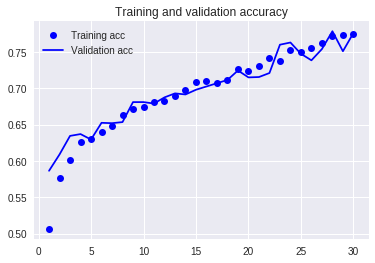

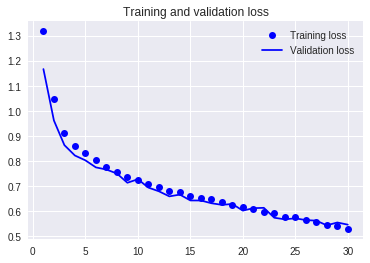

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Thus, our model does not get overfit in the first 30 epochs and is generalizing well on the validation set. Now we will train our model for more epochs to increase its accuracy.

In [0]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), shuffle=True)

Train on 6000 samples, validate on 2000 samples
Epoch 1/20
6000/6000 [==============================] - 9s 2ms/step - loss: 0.5131 - acc: 0.7910 - val_loss: 0.5013 - val_acc: 0.7960
Epoch 2/20
6000/6000 [==============================] - 9s 2ms/step - loss: 0.4927 - acc: 0.7975 - val_loss: 0.5130 - val_acc: 0.7860
Epoch 3/20
6000/6000 [==============================] - 9s 2ms/step - loss: 0.4797 - acc: 0.8030 - val_loss: 0.4777 - val_acc: 0.8150
Epoch 4/20
6000/6000 [==============================] - 9s 2ms/step - loss: 0.4684 - acc: 0.8157 - val_loss: 0.5053 - val_acc: 0.7950
Epoch 5/20
6000/6000 [==============================] - 9s 2ms/step - loss: 0.4494 - acc: 0.8238 - val_loss: 0.4685 - val_acc: 0.8145
Epoch 6/20
6000/6000 [==============================] - 9s 2ms/step - loss: 0.4367 - acc: 0.8267 - val_loss: 0.4528 - val_acc: 0.8165
Epoch 7/20
6000/6000 [==============================] - 9s 1ms/step - loss: 0.4267 - acc: 0.8318 - val_loss: 0.4483 - val_acc: 0.8225
Epoch 8/20
600

On training the model for total of 50 epochs, we are getting validation accuracy of around 84% . Plotting the model performance for last 20 epochs 



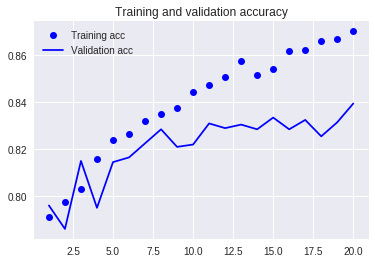

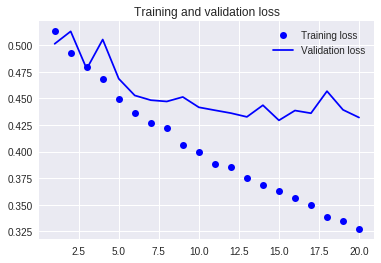

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
model.save('model2.h5')

In [0]:
model = baseline_model()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.load_weights('model2.h5')
loss_and_metrics = model.evaluate(X_test, y_test)

2000/2000 [==============================] - 1s 626us/step


In [0]:
loss_and_metrics

[0.4320090043544769, 0.8395]

In [0]:
model = baseline_model()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.load_weights('model1.h5')
loss_and_metrics = model.evaluate(X_test, y_test)
loss_and_metrics

2000/2000 [==============================] - 1s 633us/step


[0.5455117816925049, 0.776]

In [0]:
#saving the output in csv file for test_image.pkl
import csv
with open('test_image (1).pkl','rb') as f:
    test_image = pickle.load(f)
num_test = len(test_image)
test_image = np.array(test_image)
test_image = test_image.reshape((num_test,28, 28, 1))
test_image = test_image.astype('float32') / 255
with open('Mansi_Agrawal.csv', 'w') as new_file:
  csv_writer = csv.writer(new_file)
  for i in range(num_test):
    output = list(model.predict(test_image[i].reshape((1,28,28,1))))
    max_index = output.index(max(output))
    if max_index == 1:
      max_index = 6
    csv_writer.writerow([i,max_index])

Now,  We will try to decrease the dropout in our model and change a few layers then evaluate its performance.

In [0]:
#files.download('Mansi_Agrawal.csv')